In [8]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
#!pip install -U scikit-learn scipy matplotlib
from sklearn.cluster import KMeans


print('Libraries imported.')

Libraries imported.


In [23]:
import requests
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [24]:
#!pip install BeautifulSoup4
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"652df336-7a6c-4f10-8854-52123f8436fb","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":960187814,"wgRevisionId":960187814,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toron

In [26]:
My_table = soup.find('table',{'class':'wikitable sortable'})
My_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3B
</td>
<td>

In [27]:
print(My_table.tr.text)


Postal Code

Borough

Neighborhood



In [29]:
headers="Postcode,Borough,Neighbourhood"

In [30]:
table1=""
for tr in My_table.find_all('tr'):
    row1=""
    for tds in tr.find_all('td'):
        row1=row1+","+tds.text
    table1=table1+row1[1:]
print(table1)

M1A
,Not assigned
,Not assigned
M2A
,Not assigned
,Not assigned
M3A
,North York
,Parkwoods
M4A
,North York
,Victoria Village
M5A
,Downtown Toronto
,Regent Park, Harbourfront
M6A
,North York
,Lawrence Manor, Lawrence Heights
M7A
,Downtown Toronto
,Queen's Park, Ontario Provincial Government
M8A
,Not assigned
,Not assigned
M9A
,Etobicoke
,Islington Avenue, Humber Valley Village
M1B
,Scarborough
,Malvern, Rouge
M2B
,Not assigned
,Not assigned
M3B
,North York
,Don Mills
M4B
,East York
,Parkview Hill, Woodbine Gardens
M5B
,Downtown Toronto
,Garden District, Ryerson
M6B
,North York
,Glencairn
M7B
,Not assigned
,Not assigned
M8B
,Not assigned
,Not assigned
M9B
,Etobicoke
,West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
M1C
,Scarborough
,Rouge Hill, Port Union, Highland Creek
M2C
,Not assigned
,Not assigned
M3C
,North York
,Don Mills
M4C
,East York
,Woodbine Heights
M5C
,Downtown Toronto
,St. James Town
M6C
,York
,Humewood-Cedarvale
M7C
,Not assigned
,Not assigned
M8C
,N

In [50]:
file=open("toronto.csv","wb")
#file.write(bytes(headers,encoding="ascii",errors="ignore"))
file.write(bytes(table1,encoding="ascii",errors="ignore"))

7590

In [ ]:
import pandas as pd
df = pd.read_csv('toronto.csv',header=None)
df.columns=["Postalcode","Borough","Neighbourhood"]

In [ ]:
df.head(10)

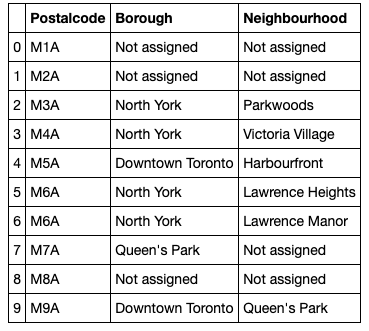

In [ ]:
indexNames = df[ df['Borough'] =='Not assigned'].index

df.drop(indexNames , inplace=True)

In [ ]:
df.head(10)

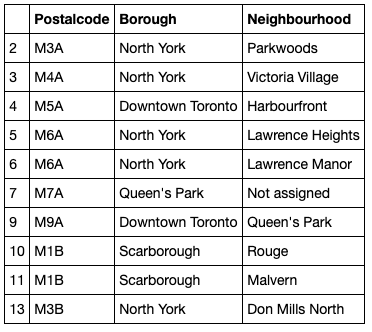

In [ ]:
df.loc[df['Neighbourhood'] =='Not assigned' , 'Neighbourhood'] = df['Borough']
df.head(10)

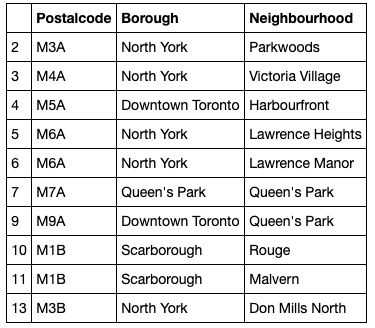

In [ ]:
result = df.groupby(['Postalcode','Borough'], sort=False).agg( ', '.join)

In [ ]:
df_new=result.reset_index()
df_new.head(15)

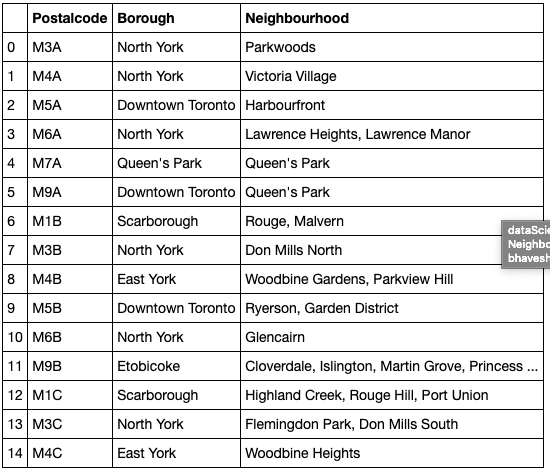

In [ ]:
df_new.shape